In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Считываем наш датасет
DataFrame=pd.read_csv('S02-hw-dataset.csv')

In [3]:
# Первые строки датасета 
DataFrame.head(5)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
# Информация о столбцах и типах
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
# Базовая описательная статистика
DataFrame.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [6]:
# Доля пропусков в каждом столбце
DataFrame.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [7]:
# Наличие полностью дублирующих строк
DataFrame.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [8]:
# Нереалистичные значения возраста
unrealistic_age = DataFrame[DataFrame['age'] > 100]
unrealistic_age[['user_id', 'age']]

,user_id,age
5,6,120.0


In [9]:
# Отрицательные значения в purchases
negative_purchases = DataFrame[DataFrame['purchases'] < 0]
negative_purchases[['user_id', 'purchases']]

,user_id,purchases
5,6,-1


In [10]:
# Покупки без выручки
contradictions = DataFrame[(DataFrame['purchases'] > 0) & (DataFrame['revenue'] == 0)]
contradictions[['user_id', 'purchases', 'revenue']]

,user_id,purchases,revenue
10,11,4,0


In [11]:
#В датасете обнаружены проблемы с качеством данных: пропуски в данных, в столбце "age" отсутствуют значения для 4.88% записей. Дубликаты, обнаружена полностью дублирующая строка (user_id=10). Нереалистичные значения, возраст пользователя 120 лет (user_id=6), что выглядит подозрительно для покупателя. Отрицательные значения, в столбце "purchases" есть отрицательное значение (-1) (user_id=6). Логические противоречия, пользователь (user_id=11) совершил 4 покупки, но выручка равна 0, чего быть скорее всего не может.

In [12]:
# Распределение по странам
country_counts = DataFrame['country'].value_counts()
country_counts

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [13]:
# Агрегация по странам
country_agg = DataFrame.groupby('country').agg(
    avg_age=('age', 'mean'),
    total_purchases=('purchases', 'sum'),
    avg_revenue=('revenue', 'mean'),
    total_revenue=('revenue', 'sum')
).round(2)


country_agg

,avg_age,total_purchases,avg_revenue,total_revenue
country,,,,
CN,24.00,9,1054.00,2108
DE,34.60,39,1445.50,8673
FR,46.25,51,675.92,8111
RU,30.08,62,790.08,10271
US,36.71,37,557.38,4459


In [14]:
# Создание возрастных групп
bins = [0, 18, 30, 45, 60, 150]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
DataFrame['age_group'] = pd.cut(DataFrame['age'], bins=bins, labels=labels, right=False)

# Агрегация по возрастным группам
age_agg = DataFrame.groupby('age_group', observed=True).agg(
    user_count=('user_id', 'count'),
    avg_purchases=('purchases', 'mean'),
    avg_revenue=('revenue', 'mean')
).round(2)

age_agg

,user_count,avg_purchases,avg_revenue
age_group,,,
0-18,1,8.00,1488.00
19-30,14,4.43,604.00
31-45,13,5.62,1162.38
46-60,10,4.10,585.60
61+,1,-1.00,785.00


In [15]:
# Географическое распределение: лидируют Россия (13 пользователей) и Франция (12 пользователей). Китай имеет минимальное представительство (2 пользователя). Выручка по странам: Германия демонстрирует самую высокую среднюю выручку на пользователя (1445.50), при этом Россия генерирует наибольшую общую выручку (10271) благодаря большему числу пользователей. Неожиданный эффект: пользователи из Китая показывают высокую среднюю выручку (1054.00), несмотря на малое количество записей. Возрастные группы: наибольшее количество пользователей в группе 19-30 лет (14 человек). Наибольшую среднюю выручку показывает группа 0-18 лет (1488.00), но это, вероятно, связано с небольшой выборкой (1 пользователь). В возрастной группе 61 наблюдается потенциальная аномалия из-за пользователя с возрастом 120 лет.

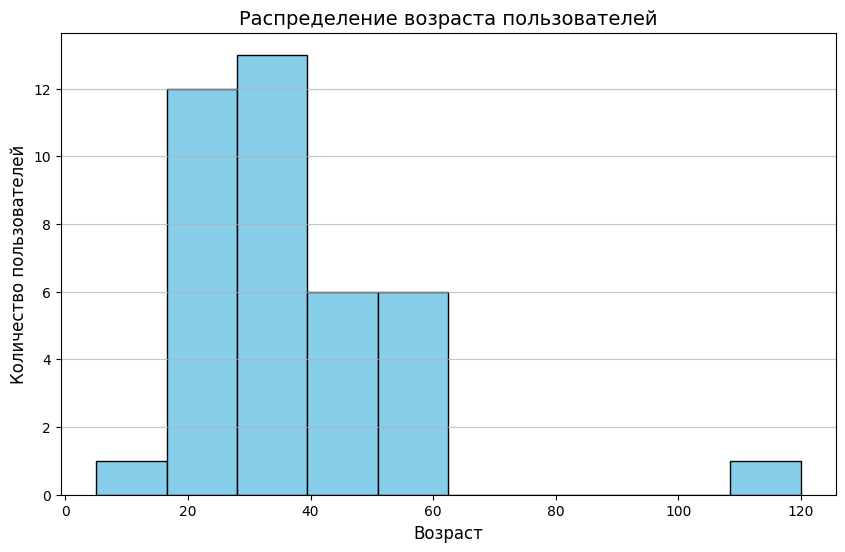

In [16]:
# Гистограмма распределения по возрасту
plt.figure(figsize=(10, 6))
plt.hist(DataFrame['age'].dropna(), bins=10, edgecolor='black', color='skyblue')
plt.title('Распределение возраста пользователей', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.savefig('figures/age_distribution.png')
plt.show()

#График показывает, что основная масса пользователей сосредоточена в возрасте 20-40 лет. 
#Присутствуют аномальные значения, которые искажают общую картину. 
#Большинство пользователей находятся в возрастной группе 25-30 лет.

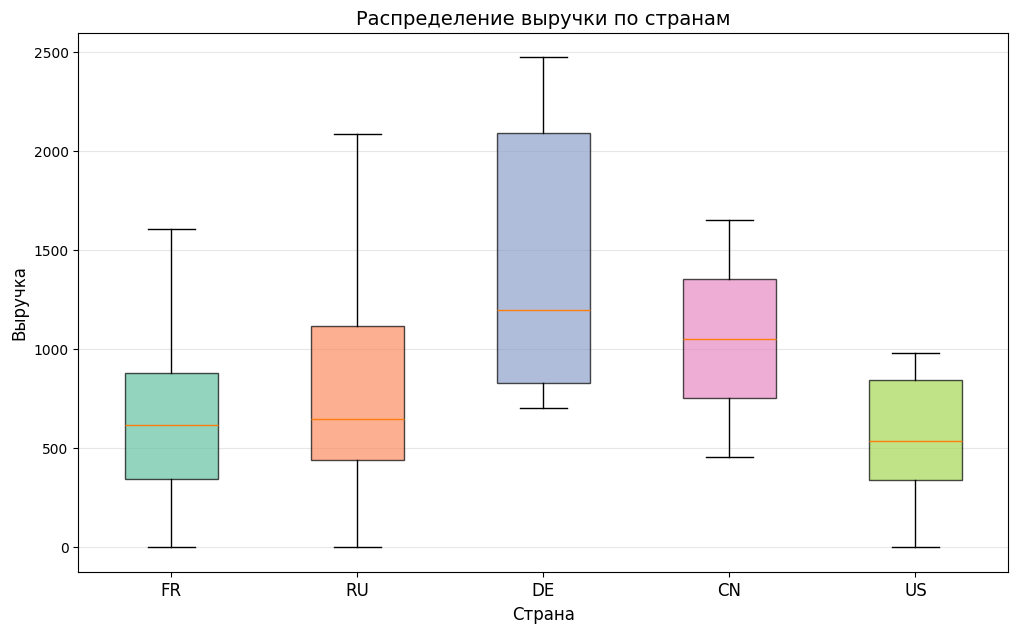

In [17]:
plt.figure(figsize=(12, 7))

# Подготовка данных
countries = DataFrame['country'].unique()
revenue_data = [DataFrame[DataFrame['country'] == country]['revenue'].values for country in countries]

# Построение boxplot с помощью matplotlib
boxplot = plt.boxplot(revenue_data, tick_labels=countries, patch_artist=True)

# Настройка цветов для каждой коробки
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
for patch, color in zip(boxplot['boxes'], colors[:len(countries)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Настройка остальных элементов
plt.title('Распределение выручки по странам', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Сохранение графика
plt.savefig('figures/revenue_by_country.png')
plt.show()

# График показывает значительные различия в распределении выручки по странам. 
#Германия имеет самые высокие медианные значения выручки, но также содержит выбросы. 
# Россия демонстрирует наибольший разброс значений выручки, что указывает на неоднородность поведения пользователей. 
#Франция имеет несколько высоких выбросов, что может указывать на отдельных "платежеспособных" клиентов.

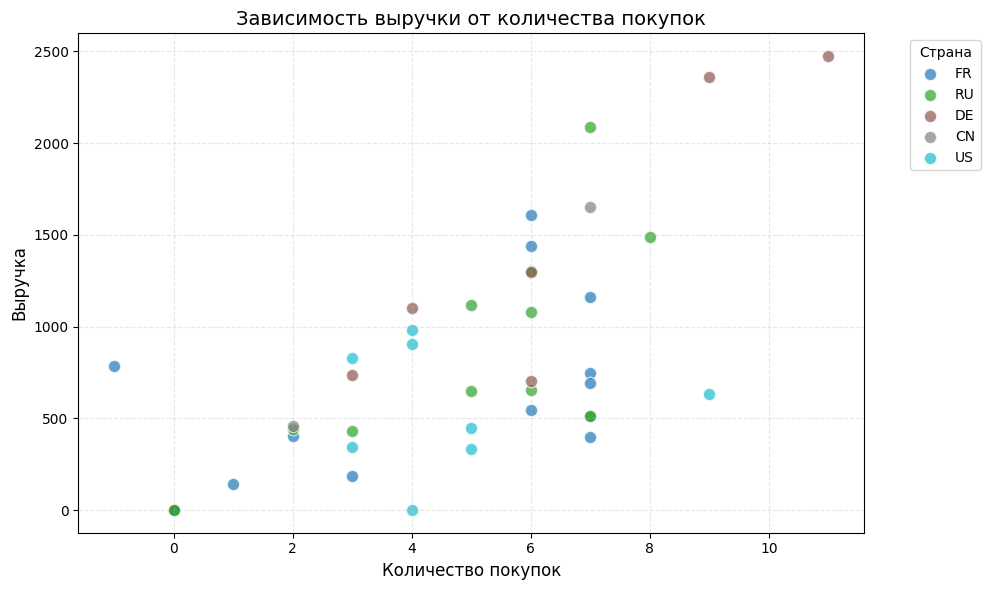

In [18]:
plt.figure(figsize=(10, 6))

# Получаем уникальные страны для цветового кодирования
countries = DataFrame['country'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))
color_map = dict(zip(countries, colors))

# Строим точки для каждого пользователя
for country in countries:
    country_data = DataFrame[DataFrame['country'] == country]
    plt.scatter(
        country_data['purchases'],
        country_data['revenue'],
        color=color_map[country],
        label=country,
        alpha=0.7,
        edgecolors='w',
        s=80  # размер точек
    )

# Добавляем подписи и оформление
plt.title('Зависимость выручки от количества покупок', fontsize=14)
plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')

# Добавляем легенду
plt.legend(title='Страна', bbox_to_anchor=(1.05, 1), loc='upper left')

# Автоматическая подгонка параметров для отображения всего графика
plt.tight_layout()

# Сохраняем график
plt.savefig('figures/purchases_vs_revenue.png', bbox_inches='tight')

plt.show()

# Диаграмма рассеяния показывает общую положительную корреляцию между количеством покупок и выручкой.
# Однако видны аномалии: имеется точка с нулём покупок, но выручку, другая точка при четырёх покупках
# имеет нулевую вырочку. Пользователи из Германии в целом показывают более высокую выручку при том же
# количестве покупок по сравнению с другими странами.